In [ ]:
# Importing all the required packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
DATA_PATH1 = "/content/drive/My Drive/DS4A-3/reco_prueba/merch_clus.csv"
DATA_PATH2 = "/content/drive/My Drive/DS4A-3/reco_prueba/payers_clus.csv"

df1 = pd.read_csv(DATA_PATH1)
df2 = pd.read_csv(DATA_PATH2)

CPU times: user 12.9 ms, sys: 1.66 ms, total: 14.5 ms
Wall time: 23.9 ms


In [ ]:
df1.head()

,merchant_id,merchant_address_city,merchant_created,merchant_classification,transactions,amount
0,CO0000001432,Cali,13/12/2018,C,360,299089051
1,CO0000000558,Medellin,6/12/2011,A+,620909,79783461147
2,CO0000001038,Medellin,4/10/2016,B+,41851,6062426972
3,CO0000000046,Bogota,27/07/2004,A,120687,81658398419
4,CO0000000349,Medellin,5/5/2009,A,306023,4159059661


In [ ]:
df2.head()

In [ ]:
df_m = df1[['merchant_id', 'amount', 'transactions', 'merchant_address_city',	'merchant_classification']]
df_m.head()

,merchant_id,amount,transactions,merchant_address_city,merchant_classification
0,CO0000001432,299089051,360,Cali,C
1,CO0000000558,79783461147,620909,Medellin,A+
2,CO0000001038,6062426972,41851,Medellin,B+
3,CO0000000046,81658398419,120687,Bogota,A
4,CO0000000349,4159059661,306023,Medellin,A


In [ ]:
df_test = df_m[df_m['merchant_classification'] == 'A+']
t = df_test['amount']
t

1        79783461147
7       129665000000
10       16160408890
11      740693000000
14      289054000000
19     1204540000000
31       23419915942
33      657008000000
51       12075568337
433        745568218
485      47612645666
538             2380
576           682800
579             3000
Name: amount, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


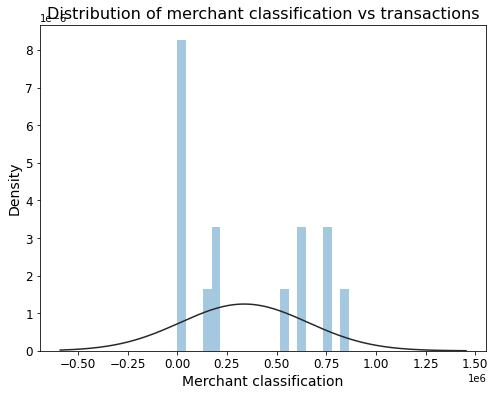

In [ ]:
# These are cases labelled as under review 

plt.figure(figsize=(8,6))

df_test = df_m[df_m['merchant_classification'] == 'A+']
x = df_test['transactions']

sns.distplot(x, bins=20, kde=False, fit=norm)

plt.title('Distribution of merchant classification vs transactions', fontsize=16)

plt.xlabel('Merchant classification', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Density', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

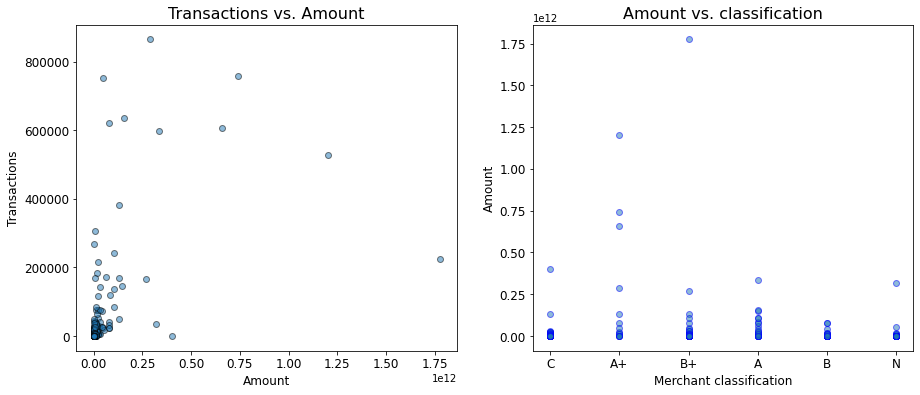

In [ ]:
# Claims vs. Income
plt.figure(figsize=(15,6))

plt.subplot(121)

plt.scatter(df_m['amount'], df_m['transactions'], edgecolor='k', alpha=0.5)

#plt.ylim(0, 50000)
plt.yticks(fontsize=12)
plt.ylabel('Transactions', fontsize=12)

plt.xticks(fontsize=12)
#plt.xlim(0, 120000)
plt.xlabel('Amount', fontsize=12)

plt.title('Transactions vs. Amount', fontsize=16)

# Income vs Age
plt.subplot(122)

plt.scatter(df_m['merchant_classification'], df_m['amount'], edgecolor='b', alpha=0.5)

#plt.xlim(0, 100)
plt.xlabel('Merchant classification', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Amount', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Amount vs. classification', fontsize=16)

plt.show()

In [ ]:
df_m.columns

Index(['merchant_id', 'amount', 'transactions', 'merchant_address_city',
       'merchant_classification'],
      dtype='object')

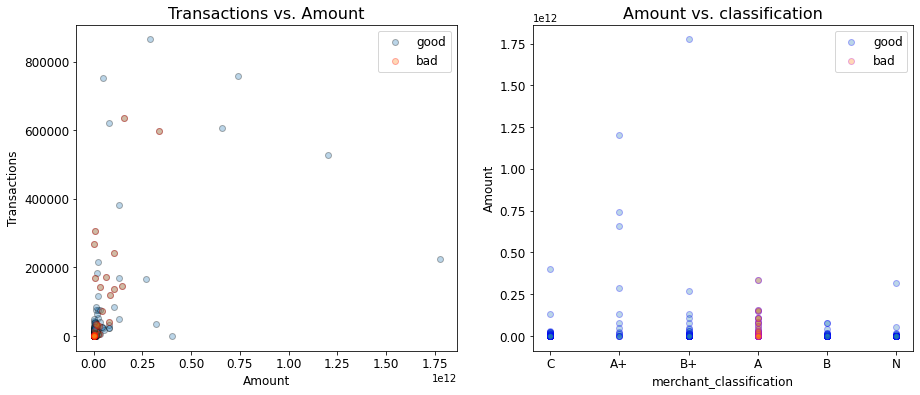

In [ ]:
df_test2 = df_m[['merchant_id', 'amount', 'transactions', 'merchant_address_city',
       'merchant_classification']]
df_good = df_test2[df_test2['merchant_classification'] >= 'A']
df_bad = df_test2[df_test2['merchant_classification'] <= 'A']

plt.figure(figsize=(15,6))

# Claims vs. Income - gendered
plt.subplot(121)

plt.scatter(df_good['amount'], df_good['transactions'], edgecolor='k', alpha=0.3, label='good')
plt.scatter(df_bad['amount'], df_bad['transactions'], edgecolor='r', alpha=0.3, label='bad')

plt.legend(loc='best', fontsize=12)

#plt.xlim(0, 120000)
plt.xlabel('Amount', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 50000)
plt.ylabel('Transactions', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Transactions vs. Amount', fontsize=16)

# Income vs. Age - gendered
plt.subplot(122)

plt.scatter(df_good['merchant_classification'],df_good['amount'], edgecolor='b', alpha=0.3, label='good')
plt.scatter(df_bad['merchant_classification'],df_bad['amount'], edgecolor='m', alpha=0.3, label='bad')

plt.legend(loc='best', fontsize=12)

#plt.xlim(0, 100)
plt.xlabel('merchant_classification', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(0, 120000)
plt.ylabel('Amount', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Amount vs. classification', fontsize=16)

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


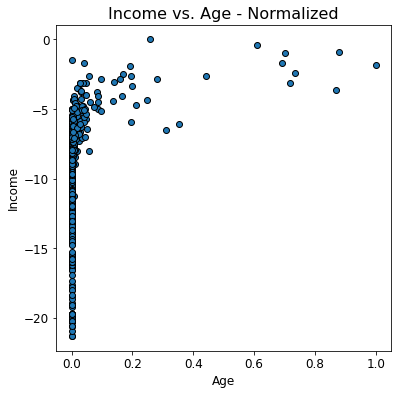

In [ ]:
# Function Normalize
# Input = df, DataFrame we are interested in normalizing
# This is the Min/Max scaling method 

def normalize(df):
    result = df.copy()
    
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
        
    return result

# Create new DataFrame containing normalized data 
df_norm = normalize(df_m[['amount', 'transactions']])

# Claims vs. Income - Normalized
plt.figure(figsize=(6, 6))

plt.scatter(df_norm['transactions'], np.log(df_norm['amount']), edgecolor='k')

#plt.xlim(-0.05, 1.05)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)

#plt.ylim(-0.05, 1.05)
plt.ylabel('Income', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Income vs. Age - Normalized', fontsize=16)

plt.show()

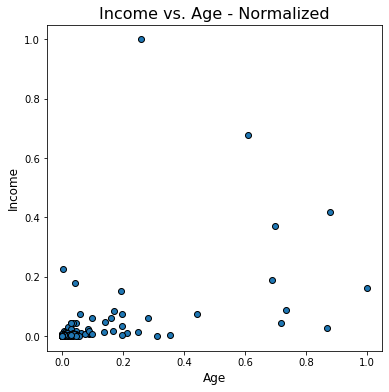

In [ ]:
# Claims vs. Age - Normalized
plt.figure(figsize=(6, 6))

plt.scatter(df_norm['transactions'], df_norm['amount'], edgecolor='k')

#plt.xlim(-0.05, 1.05)
plt.xlabel('Age', fontsize=12)

#plt.ylim(-0.05, 1.05)
plt.ylabel('Income', fontsize=12)

plt.title('Income vs. Age - Normalized', fontsize=16)

plt.show()

Initial Centroids (income, claims) are: 
 {1: array([0.8488177 , 0.17889592]), 2: array([0.05436321, 0.36153845]), 3: array([0.27540093, 0.53000022]), 4: array([0.30591892, 0.30447436])}


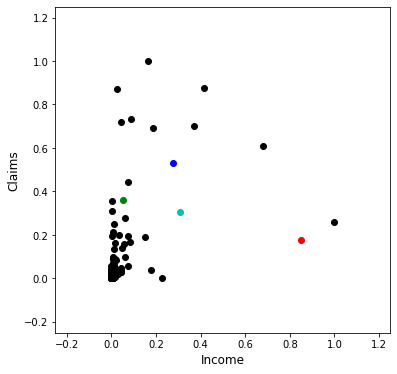

In [ ]:
# Now we will begin our k-means method:

# Assign how many clusters (k-number) you would like to have
# This is only one implementation (crude) method of initializing the cluster centers
k = 4

#Select random centers:
np.random.seed(15)
centroids = {i+1: np.random.rand(1,2)[0] for i in range(k)}

print("Initial Centroids (income, claims) are: \n", centroids)

plt.figure(figsize=(6, 6))

plt.scatter(df_norm['amount'], df_norm['transactions'], color='k')

color_map = {1: 'r', 2: 'g', 3: 'b' , 4:'c', 5:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=color_map[i])

plt.xlim(-0.25,1.25)
plt.xlabel('Income', fontsize=12)

plt.ylim(-0.25,1.25)
plt.ylabel('Claims', fontsize=12)

plt.show()

In [ ]:
def nearest_neigh(row,centroids):
    dist=np.inf
    nearest=0
    point=np.array([row['amount'],row['transactions']])
    for idx,cent in centroids.items():
        dist0=np.linalg.norm(point-np.array(cent))
        if dist>dist0:
            dist=dist0
            nearest=idx
    return nearest

#We store the resulting centroid in the dataframe
df_norm['classification']=df_norm.apply(lambda x: nearest_neigh(x,centroids),axis=1)

#Next, we compute the new centroids
centroids_new=centroids.copy()
for idx in centroids_new.keys():
    centroids_new[idx]=np.array(df_norm[df_norm['classification']==idx][['amount','transactions']].mean())
    if np.isnan(centroids_new[1][0]) :
        centroids_new[idx]=centroids[idx]

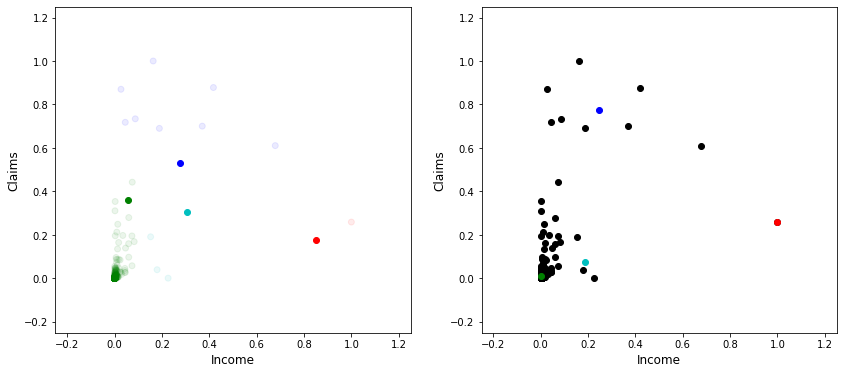

In [ ]:
#Let us plot our findings:

fig,ax=plt.subplots(1,2,figsize=(14, 6))
color_map = {1: 'r', 2: 'g', 3: 'b' , 4:'c', 5:'y'}

#First plot shows the current classification with old centroids
ax[0].scatter(df_norm['amount'], df_norm['transactions'], c=df_norm['classification'].apply(lambda x: color_map[x]),alpha=0.08)
for i in centroids.keys():
    ax[0].scatter(*centroids[i], color=color_map[i])

ax[0].set_xlim(-0.25,1.25)
ax[0].set_xlabel('Income', fontsize=12)
ax[0].set_ylim(-0.25,1.25)
ax[0].set_ylabel('Claims', fontsize=12)

#Second plot shows the new centroids
ax[1].scatter(df_norm['amount'], df_norm['transactions'], color='k')
for i in centroids_new.keys():
    ax[1].scatter(*centroids_new[i], color=color_map[i])

ax[1].set_xlim(-0.25,1.25)
ax[1].set_xlabel('Income', fontsize=12)
ax[1].set_ylim(-0.25,1.25)
ax[1].set_ylabel('Claims', fontsize=12)

plt.show()

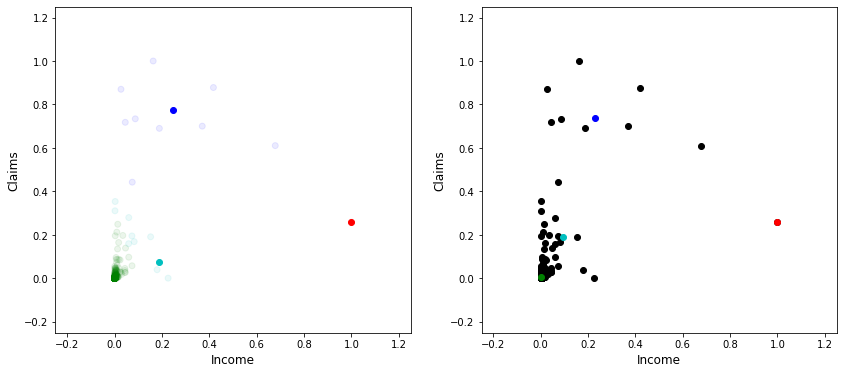

In [ ]:
#We set the old centroids
centroids_old=centroids_new.copy()

#We store the resulting centroid in the dataframe
df_norm['classification']=df_norm.apply(lambda x: nearest_neigh(x,centroids_old),axis=1)

#Next, we compute the new centroids
for idx in centroids_new.keys():
    centroids_new[idx]=np.array(df_norm[df_norm['classification']==idx][['amount','transactions']].mean())
    if np.isnan(centroids_new[1][0]) :
        centroids_new[idx]=centroids_old[idx]
        
        
#Let us plot our findings:

fig,ax=plt.subplots(1,2,figsize=(14, 6))
color_map = {1: 'r', 2: 'g', 3: 'b' , 4:'c', 5:'y'}

#First plot shows the current classification with old centroids
ax[0].scatter(df_norm['amount'], df_norm['transactions'], c=df_norm['classification'].apply(lambda x: color_map[x]),alpha=0.08)
for i in centroids.keys():
    ax[0].scatter(*centroids_old[i], color=color_map[i])

ax[0].set_xlim(-0.25,1.25)
ax[0].set_xlabel('Income', fontsize=12)
ax[0].set_ylim(-0.25,1.25)
ax[0].set_ylabel('Claims', fontsize=12)

#Second plot shows the new centroids
ax[1].scatter(df_norm['amount'], df_norm['transactions'], color='k')
for i in centroids_new.keys():
    ax[1].scatter(*centroids_new[i], color=color_map[i])

ax[1].set_xlim(-0.25,1.25)
ax[1].set_xlabel('Income', fontsize=12)
ax[1].set_ylim(-0.25,1.25)
ax[1].set_ylabel('Claims', fontsize=12)

plt.show()

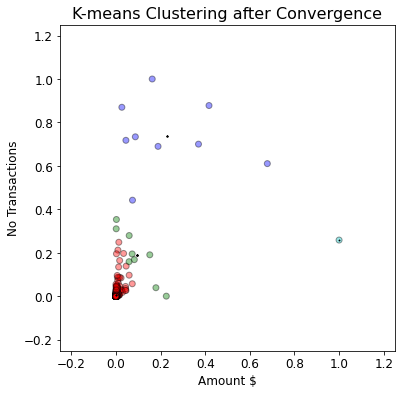

In [ ]:
k = 4

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_norm)

# Iterative procedure to learn labels  
labels = kmeans.predict(df_norm)
centroids = kmeans.cluster_centers_

# Plot the data learned
plt.figure(figsize=(6, 6))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(df_norm['amount'], df_norm['transactions'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')

plt.xlim(-0.25, 1.25)
plt.xlabel('Amount $', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(-0.25, 1.25)
plt.ylabel('No Transactions', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means Clustering after Convergence', fontsize=16)

plt.show()

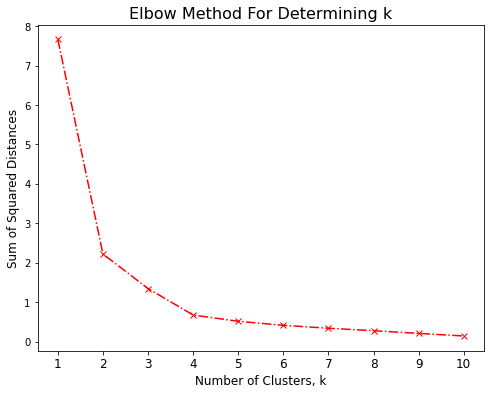

In [ ]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm[['amount', 'transactions']])
    sum_sq_d.append(km.inertia_)
    
plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()